In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Data-Collisions.csv')

C:\Users\Alejandro\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
#Eliminar columnas con las que no se va a trabajar---- DEJAR --HITPARKEDCAR--

In [7]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS', 'ADDRTYPE', 'INTKEY',
        'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)

In [8]:
df.head()

,SEVERITYCODE,X,Y,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,32,One parked--one moving,N
3,1,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,23,From same direction - all others,N
4,2,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,Raining,Wet,Daylight,10,Entering at angle,N


In [9]:
df.shape

(194673, 19)

In [10]:
#Conocer la tipologia de las columnas
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
LOCATION          object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
INCDTTM           object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
ST_COLDESC        object
HITPARKEDCAR      object
dtype: object

In [11]:
#Ver los missing values
df.isnull().sum(axis=0)

SEVERITYCODE        0
X                5334
Y                5334
LOCATION         2677
SEVERITYDESC        0
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDATE             0
INCDTTM             0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
ST_COLDESC       4904
HITPARKEDCAR        0
dtype: int64

In [12]:
#No toque las columnas X, Y, LOCATION, ST_COLDESC y ST_COLCODE. Lo que hadre sera eliminar
#los missing values

In [13]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [14]:
df['COLLISIONTYPE'].replace(np.nan, 'Parked Car', inplace=True)

In [15]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [16]:
df['UNDERINFL'].replace(np.nan, 'N', inplace=True)

In [17]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [18]:
df['WEATHER'].replace(np.nan, 'Clear', inplace=True)

In [19]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [20]:
df['ROADCOND'].replace(np.nan, 'Dry', inplace=True)

In [21]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [22]:
df['LIGHTCOND'].replace(np.nan, 'Daylight', inplace=True)

In [23]:
df.isnull().sum(axis=0)

SEVERITYCODE        0
X                5334
Y                5334
LOCATION         2677
SEVERITYDESC        0
COLLISIONTYPE       0
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDATE             0
INCDTTM             0
UNDERINFL           0
WEATHER             0
ROADCOND            0
LIGHTCOND           0
ST_COLCODE         18
ST_COLDESC       4904
HITPARKEDCAR        0
dtype: int64

In [24]:
#Borrar los missing values (NaN), de las columnas ['X', 'Y', 'LOCATION', 'ST_COLCODE', 'ST_COLDESC']

In [25]:
df.dropna(subset=['X', 'Y', 'LOCATION', 'ST_COLCODE', 'ST_COLDESC'], axis=0, inplace=True)

In [26]:
df.isnull().sum(axis=0)

SEVERITYCODE     0
X                0
Y                0
LOCATION         0
SEVERITYDESC     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
ST_COLDESC       0
HITPARKEDCAR     0
dtype: int64

In [27]:
df.shape

(184582, 19)

# Modeling

## Weather attribute

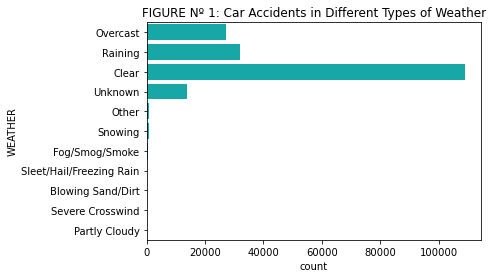

In [28]:
sns.countplot(y=df['WEATHER'], data=df, color="c")
plt.title('FIGURE Nº 1: Car Accidents in Different Types of Weather')
plt.show()

In [29]:
### df['WEATHER'].value_counts()

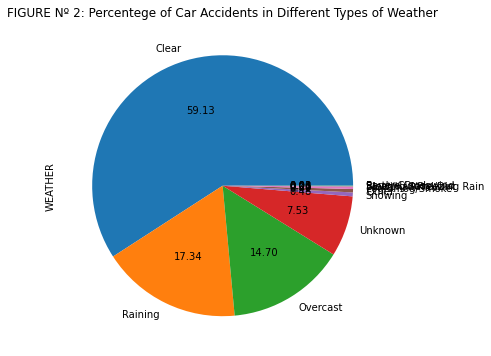

In [30]:
#Pie Chart mostrando el porcentaje de la columna WEATHER
plot1 = (100 * df['WEATHER'].value_counts() / len(df['WEATHER'])).plot(kind='pie', autopct='%.2f', 
        figsize=(6, 6), title='FIGURE Nº 2: Percentege of Car Accidents in Different Types of Weather')

In [31]:
#Distribucion de porcentaje de la columna WEATHER
weather_per = 100 * df['WEATHER'].value_counts() / len(df['WEATHER'])
weather_per

Clear                       59.129276
Raining                     17.340802
Overcast                    14.698075
Unknown                      7.525653
Snowing                      0.484338
Other                        0.418784
Fog/Smog/Smoke               0.299596
Sleet/Hail/Freezing Rain     0.060678
Blowing Sand/Dirt            0.027088
Severe Crosswind             0.013002
Partly Cloudy                0.002709
Name: WEATHER, dtype: float64

In [32]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    128476
Injury Collision                   56106
Name: SEVERITYDESC, dtype: int64

Text(0.5, 1.0, 'FIGURE Nº 3: Severity of Car Accidents vs. Weather')

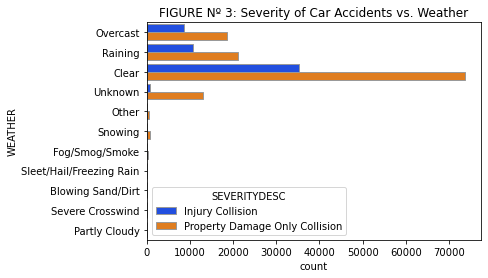

In [33]:
sns.countplot(y=df['WEATHER'], hue=df['SEVERITYDESC'], data=df, palette="bright", edgecolor=".6")
plt.title('FIGURE Nº 3: Severity of Car Accidents vs. Weather')

In [34]:
#Tabla de la relacion entre las columnas WEATHER y SEVERITYDESC
pd.crosstab(index=df['WEATHER'],
            columns=df['SEVERITYDESC'], margins=True)

SEVERITYDESC,Injury Collision,Property Damage Only Collision,All
WEATHER,,,
Blowing Sand/Dirt,13,37,50
Clear,35353,73789,109142
Fog/Smog/Smoke,184,369,553
Other,110,663,773
Overcast,8605,18525,27130
Partly Cloudy,3,2,5
Raining,10858,21150,32008
Severe Crosswind,7,17,24
Sleet/Hail/Freezing Rain,27,85,112


In [35]:
#Tabla de Porcentaje de la relacion entre las columnas WEATHER y SEVERITYDESC
pd.crosstab(index=df['WEATHER'], columns=df['SEVERITYDESC'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

SEVERITYDESC,Injury Collision,Property Damage Only Collision,All
WEATHER,,,
Blowing Sand/Dirt,0.007043,0.020045,0.027088
Clear,19.153005,39.976271,59.129276
Fog/Smog/Smoke,0.099685,0.199911,0.299596
Other,0.059594,0.359190,0.418784
Overcast,4.661885,10.036190,14.698075
Partly Cloudy,0.001625,0.001084,0.002709
Raining,5.882480,11.458322,17.340802
Severe Crosswind,0.003792,0.009210,0.013002
Sleet/Hail/Freezing Rain,0.014628,0.046050,0.060678


In [36]:
df['COLLISIONTYPE'].value_counts()

Parked Car    46381
Angles        34460
Rear Ended    32968
Other         22277
Sideswipe     18034
Left Turn     13624
Pedestrian     6551
Cycles         5378
Right Turn     2912
Head On        1997
Name: COLLISIONTYPE, dtype: int64

Text(0.5, 1.0, 'FIGURE Nº 4: Type of Collision vs Weather')

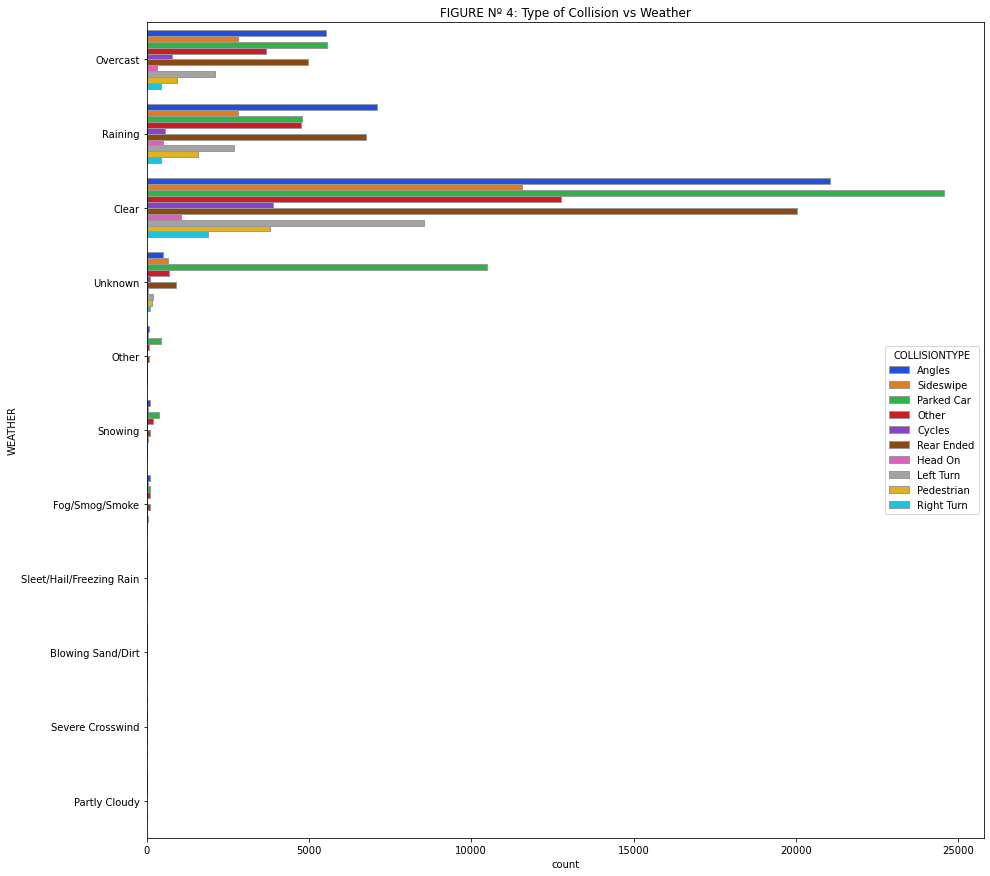

In [37]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y=df['WEATHER'], hue=df['COLLISIONTYPE'], data=df, palette="bright", edgecolor=".6")
plt.title('FIGURE Nº 4: Type of Collision vs Weather')

In [38]:
#Tabla de la relacion entre las columnas WEATHER y COLLISIONTYPE
pd.crosstab(index=df['WEATHER'],
            columns=df['COLLISIONTYPE'], margins=True)

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,All
WEATHER,,,,,,,,,,,
Blowing Sand/Dirt,6,1,1,2,3,20,1,8,2,6,50
Clear,21042,3890,1071,8534,12759,24551,3791,20026,1905,11573,109142
Fog/Smog/Smoke,98,5,5,38,120,114,21,101,10,41,553
Other,61,7,5,26,60,456,21,77,6,54,773
Overcast,5515,781,316,2109,3681,5565,939,4968,448,2808,27130
Partly Cloudy,1,0,0,1,1,1,0,0,0,1,5
Raining,7095,579,519,2685,4754,4778,1580,6751,436,2831,32008
Severe Crosswind,4,0,0,1,9,4,0,5,1,0,24
Sleet/Hail/Freezing Rain,27,1,4,3,28,26,6,13,0,4,112


In [39]:
#Tabla de Porcentaje de la relacion entre las columnas WEATHER y COLLISIONTYPE
pd.crosstab(index=df['WEATHER'], columns=df['COLLISIONTYPE'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,All
WEATHER,,,,,,,,,,,
Blowing Sand/Dirt,0.003251,0.000542,0.000542,0.001084,0.001625,0.010835,0.000542,0.004334,0.001084,0.003251,0.027088
Clear,11.399811,2.107464,0.580230,4.623419,6.912375,13.300864,2.053830,10.849379,1.032062,6.269842,59.129276
Fog/Smog/Smoke,0.053093,0.002709,0.002709,0.020587,0.065012,0.061761,0.011377,0.054718,0.005418,0.022212,0.299596
Other,0.033048,0.003792,0.002709,0.014086,0.032506,0.247045,0.011377,0.041716,0.003251,0.029255,0.418784
Overcast,2.987832,0.423118,0.171198,1.142582,1.994236,3.014920,0.508717,2.691487,0.242711,1.521275,14.698075
Partly Cloudy,0.000542,0.000000,0.000000,0.000542,0.000542,0.000542,0.000000,0.000000,0.000000,0.000542,0.002709
Raining,3.843820,0.313682,0.281176,1.454638,2.575549,2.588551,0.855988,3.657453,0.236209,1.533736,17.340802
Severe Crosswind,0.002167,0.000000,0.000000,0.000542,0.004876,0.002167,0.000000,0.002709,0.000542,0.000000,0.013002
Sleet/Hail/Freezing Rain,0.014628,0.000542,0.002167,0.001625,0.015169,0.014086,0.003251,0.007043,0.000000,0.002167,0.060678


## Road Condition Attribute

Text(0.5, 1.0, 'FIGURE Nº 5: Car Accidents in Different Types of Road Conditions')

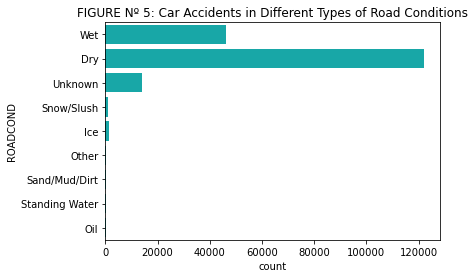

In [40]:
sns.countplot(y=df['ROADCOND'], data=df, color="c")
plt.title('FIGURE Nº 5: Car Accidents in Different Types of Road Conditions')

In [41]:
df['ROADCOND'].value_counts()

Dry               122192
Wet                46054
Unknown            13835
Ice                 1176
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64

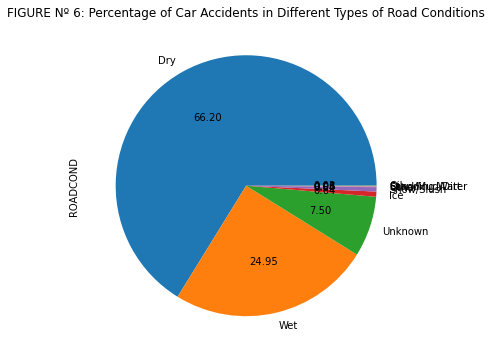

In [42]:
plot2 = (100 * df['ROADCOND'].value_counts() / len(df['ROADCOND'])).plot(kind='pie', autopct='%.2f', 
        figsize=(6, 6), title='FIGURE Nº 6: Percentage of Car Accidents in Different Types of Road Conditions')

In [43]:
#Distribucion de porcentaje de la columna ROADCOND
road_per = 100 * df['ROADCOND'].value_counts() / len(df['ROADCOND'])
road_per

Dry               66.199304
Wet               24.950429
Unknown            7.495314
Ice                0.637115
Snow/Slush         0.535805
Other              0.063386
Standing Water     0.055260
Sand/Mud/Dirt      0.034673
Oil                0.028714
Name: ROADCOND, dtype: float64

Text(0.5, 1.0, 'FIGURE Nº 7: Severity of car accidents vs. Road Condition')

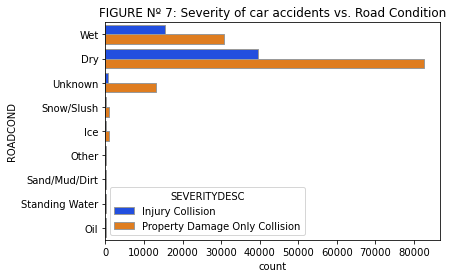

In [44]:
sns.countplot(y=df['ROADCOND'], hue=df['SEVERITYDESC'], data=df, palette="bright", edgecolor=".6")
plt.title('FIGURE Nº 7: Severity of car accidents vs. Road Condition')

In [45]:
#Tabla de la relacion entre las columnas ROADCOND y SEVERITYDESC
pd.crosstab(index=df['ROADCOND'],
            columns=df['SEVERITYDESC'], margins=True)

SEVERITYDESC,Injury Collision,Property Damage Only Collision,All
ROADCOND,,,
Dry,39488,82704,122192
Ice,265,911,1176
Oil,20,33,53
Other,39,78,117
Sand/Mud/Dirt,22,42,64
Snow/Slush,166,823,989
Standing Water,26,76,102
Unknown,713,13122,13835
Wet,15367,30687,46054


In [46]:
#Tabla de Porcentaje de la relacion entre las columnas ROADCOND y SEVERITYDESC
pd.crosstab(index=df['ROADCOND'], columns=df['SEVERITYDESC'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

SEVERITYDESC,Injury Collision,Property Damage Only Collision,All
ROADCOND,,,
Dry,21.393202,44.806102,66.199304
Ice,0.143568,0.493548,0.637115
Oil,0.010835,0.017878,0.028714
Other,0.021129,0.042258,0.063386
Sand/Mud/Dirt,0.011919,0.022754,0.034673
Snow/Slush,0.089933,0.445872,0.535805
Standing Water,0.014086,0.041174,0.055260
Unknown,0.386278,7.109036,7.495314
Wet,8.325297,16.625131,24.950429


Text(0.5, 1.0, 'FIGURE Nº 8: Type of Collision vs Road Condition')

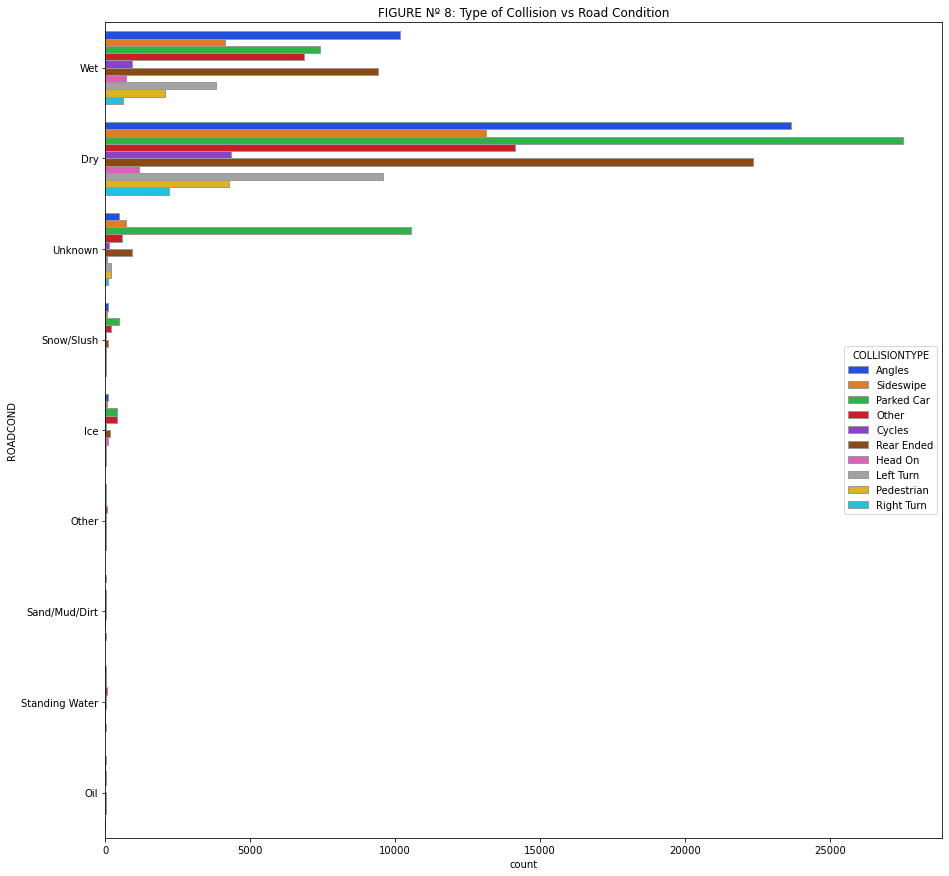

In [47]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y=df['ROADCOND'], hue=df['COLLISIONTYPE'], data=df, palette="bright", edgecolor=".6")
plt.title('FIGURE Nº 8: Type of Collision vs Road Condition')

In [48]:
#Tabla de la relacion entre las columnas ROADCOND y COLLISIONTYPE
pd.crosstab(index=df['ROADCOND'],
            columns=df['COLLISIONTYPE'], margins=True)

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,All
ROADCOND,,,,,,,,,,,
Dry,23643,4326,1144,9561,14117,27501,4260,22334,2187,13119,122192
Ice,88,9,73,23,385,387,13,143,2,53,1176
Oil,2,0,2,3,28,5,0,11,1,1,53
Other,13,2,5,7,38,31,2,14,0,5,117
Sand/Mud/Dirt,6,2,1,0,27,20,2,6,0,0,64
Snow/Slush,92,4,31,23,195,469,25,102,10,38,989
Standing Water,5,3,1,1,46,12,2,27,0,5,102
Unknown,461,120,39,186,582,10543,181,932,98,693,13835
Wet,10150,912,701,3820,6859,7413,2066,9399,614,4120,46054


In [49]:
#Tabla de Porcentaje de la relacion entre las columnas ROADCOND y COLLITIONTYPE
pd.crosstab(index=df['ROADCOND'], columns=df['COLLISIONTYPE'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,All
ROADCOND,,,,,,,,,,,
Dry,12.808941,2.343674,0.619779,5.179812,7.648091,14.899069,2.307917,12.099771,1.184839,7.107410,66.199304
Ice,0.047675,0.004876,0.039549,0.012461,0.208579,0.209663,0.007043,0.077472,0.001084,0.028714,0.637115
Oil,0.001084,0.000000,0.001084,0.001625,0.015169,0.002709,0.000000,0.005959,0.000542,0.000542,0.028714
Other,0.007043,0.001084,0.002709,0.003792,0.020587,0.016795,0.001084,0.007585,0.000000,0.002709,0.063386
Sand/Mud/Dirt,0.003251,0.001084,0.000542,0.000000,0.014628,0.010835,0.001084,0.003251,0.000000,0.000000,0.034673
Snow/Slush,0.049842,0.002167,0.016795,0.012461,0.105644,0.254088,0.013544,0.055260,0.005418,0.020587,0.535805
Standing Water,0.002709,0.001625,0.000542,0.000542,0.024921,0.006501,0.001084,0.014628,0.000000,0.002709,0.055260
Unknown,0.249753,0.065012,0.021129,0.100768,0.315307,5.711825,0.098059,0.504925,0.053093,0.375443,7.495314
Wet,5.498911,0.494089,0.379777,2.069541,3.715964,4.016101,1.119286,5.092046,0.332643,2.232070,24.950429


## Light Conditionn Attribute

Text(0.5, 1.0, 'FIGURE Nº 9: Car Accidents in Different Types of Light Conditions')

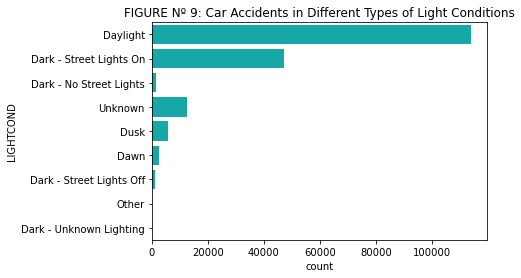

In [50]:
sns.countplot(y=df['LIGHTCOND'], data=df, color="c")
plt.title('FIGURE Nº 9: Car Accidents in Different Types of Light Conditions')

In [51]:
df['LIGHTCOND'].value_counts()

Daylight                    113845
Dark - Street Lights On      47311
Unknown                      12430
Dusk                          5774
Dawn                          2421
Dark - No Street Lights       1450
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

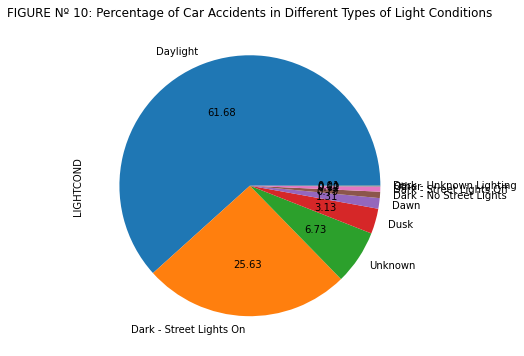

In [52]:
plot3 = (100 * df['LIGHTCOND'].value_counts() / len(df['LIGHTCOND'])).plot(kind='pie', autopct='%.2f', 
        figsize=(6, 6), title='FIGURE Nº 10: Percentage of Car Accidents in Different Types of Light Conditions')

In [53]:
#Distribucion de porcentaje de la columna LIGHTCOND
light_per = 100 * df['LIGHTCOND'].value_counts() / len(df['LIGHTCOND'])
light_per

Daylight                    61.677195
Dark - Street Lights On     25.631427
Unknown                      6.734134
Dusk                         3.128149
Dawn                         1.311612
Dark - No Street Lights      0.785559
Dark - Street Lights Off     0.624113
Other                        0.101852
Dark - Unknown Lighting      0.005959
Name: LIGHTCOND, dtype: float64

Text(0.5, 1.0, 'FIGURE Nº 11: Severity of car accidents vs. Lignt Condition')

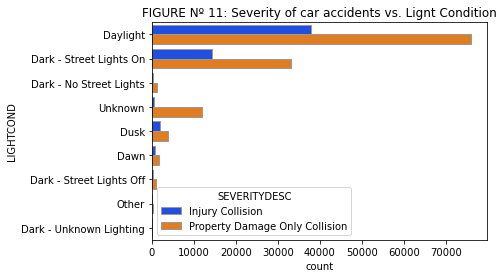

In [54]:
sns.countplot(y=df['LIGHTCOND'], hue=df['SEVERITYDESC'], data=df, palette="bright", edgecolor=".6")
plt.title('FIGURE Nº 11: Severity of car accidents vs. Lignt Condition')

In [55]:
#Tabla de la relacion entre las columnas LIGHTCOND y SEVERITYDESC
pd.crosstab(index=df['LIGHTCOND'],
            columns=df['SEVERITYDESC'], margins=True)

SEVERITYDESC,Injury Collision,Property Damage Only Collision,All
LIGHTCOND,,,
Dark - No Street Lights,319,1131,1450
Dark - Street Lights Off,306,846,1152
Dark - Street Lights On,14189,33122,47311
Dark - Unknown Lighting,4,7,11
Dawn,810,1611,2421
Daylight,37941,75904,113845
Dusk,1917,3857,5774
Other,37,151,188
Unknown,583,11847,12430


In [56]:
#Tabla de Porcentaje de la relacion entre las columnas LIGHTCOND y SEVERITYDESC
pd.crosstab(index=df['LIGHTCOND'], columns=df['SEVERITYDESC'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

SEVERITYDESC,Injury Collision,Property Damage Only Collision,All
LIGHTCOND,,,
Dark - No Street Lights,0.172823,0.612736,0.785559
Dark - Street Lights Off,0.165780,0.458333,0.624113
Dark - Street Lights On,7.687098,17.944328,25.631427
Dark - Unknown Lighting,0.002167,0.003792,0.005959
Dawn,0.438829,0.872783,1.311612
Daylight,20.555092,41.122103,61.677195
Dusk,1.038563,2.089586,3.128149
Other,0.020045,0.081806,0.101852
Unknown,0.315849,6.418286,6.734134


Text(0.5, 1.0, 'FIGURE Nº 12: Type of Collision vs Lignt Condition')

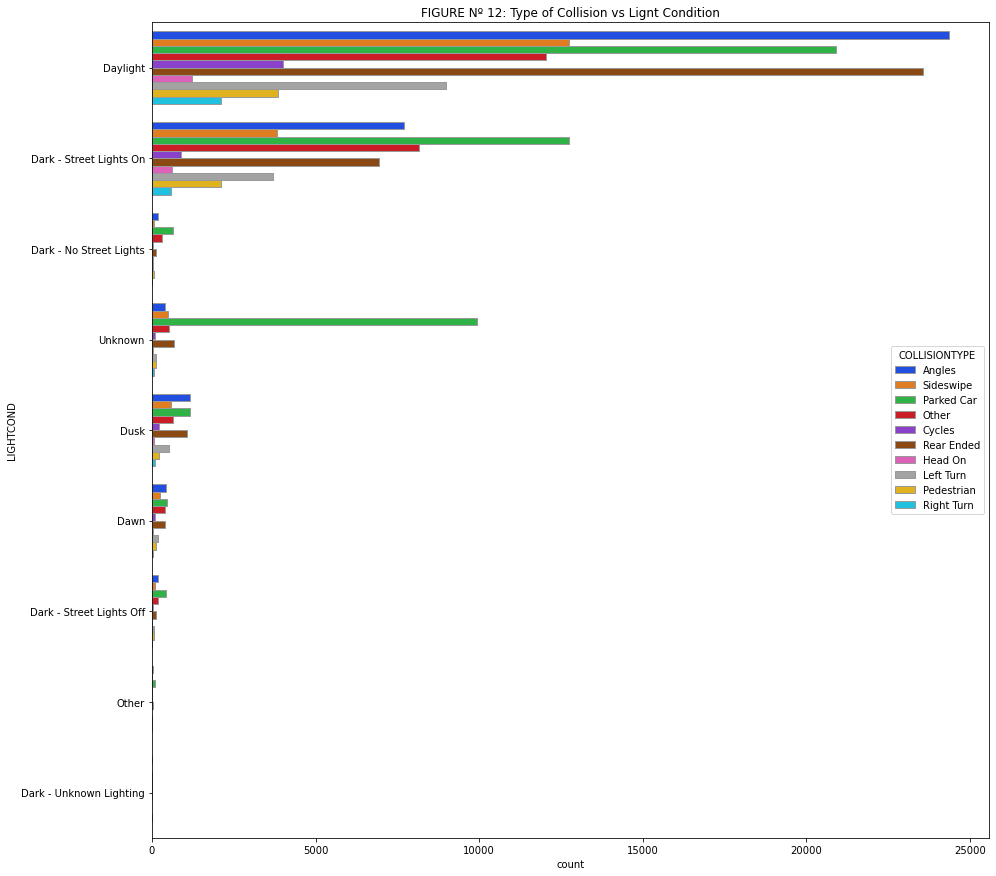

In [57]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y=df['LIGHTCOND'], hue=df['COLLISIONTYPE'], data=df, palette="bright", edgecolor=".6")
plt.title('FIGURE Nº 12: Type of Collision vs Lignt Condition')

In [58]:
#Tabla de la relacion entre las columnas LIGHTCOND y COLLISIONTYPE
pd.crosstab(index=df['LIGHTCOND'],
            columns=df['COLLISIONTYPE'], margins=True)

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,All
LIGHTCOND,,,,,,,,,,,
Dark - No Street Lights,179,32,22,29,296,638,52,122,6,74,1450
Dark - Street Lights Off,187,28,13,58,190,416,49,123,8,80,1152
Dark - Street Lights On,7712,901,608,3690,8152,12757,2108,6952,596,3835,47311
Dark - Unknown Lighting,2,1,0,0,3,2,2,1,0,0,11
Dawn,436,107,32,180,408,456,132,408,30,232,2421
Daylight,24369,4003,1229,9001,12045,20905,3864,23578,2115,12736,113845
Dusk,1164,211,69,520,652,1170,225,1081,93,589,5774
Other,18,2,0,8,15,99,6,30,0,10,188
Unknown,393,93,24,138,516,9938,113,673,64,478,12430


In [59]:
#Tabla de Porcentaje de la relacion entre las columnas LIGHTCOND y COLLITIONTYPE
pd.crosstab(index=df['LIGHTCOND'], columns=df['COLLISIONTYPE'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,All
LIGHTCOND,,,,,,,,,,,
Dark - No Street Lights,0.096976,0.017336,0.011919,0.015711,0.160362,0.345646,0.028172,0.066095,0.003251,0.040091,0.785559
Dark - Street Lights Off,0.101310,0.015169,0.007043,0.031422,0.102935,0.225374,0.026546,0.066637,0.004334,0.043341,0.624113
Dark - Street Lights On,4.178089,0.488130,0.329393,1.999112,4.416465,6.911291,1.142040,3.766348,0.322892,2.077667,25.631427
Dark - Unknown Lighting,0.001084,0.000542,0.000000,0.000000,0.001625,0.001084,0.001084,0.000542,0.000000,0.000000,0.005959
Dawn,0.236209,0.057969,0.017336,0.097518,0.221040,0.247045,0.071513,0.221040,0.016253,0.125689,1.311612
Daylight,13.202262,2.168684,0.665829,4.876423,6.525555,11.325590,2.093379,12.773727,1.145832,6.899914,61.677195
Dusk,0.630614,0.114312,0.037382,0.281718,0.353231,0.633865,0.121897,0.585648,0.050384,0.319099,3.128149
Other,0.009752,0.001084,0.000000,0.004334,0.008126,0.053635,0.003251,0.016253,0.000000,0.005418,0.101852
Unknown,0.212914,0.050384,0.013002,0.074764,0.279551,5.384057,0.061219,0.364608,0.034673,0.258963,6.734134


In [60]:
#Cambiar los 4 valores de la columna UBDERINFL a solo 2 valores - Yes y No 
df['UNDERINFL'].value_counts()

N    97620
0    78082
Y     5001
1     3879
Name: UNDERINFL, dtype: int64

In [61]:
df['UNDERINFL'].replace('0', 'No', inplace=True)
df['UNDERINFL'].replace('1', 'Yes', inplace=True)
df['UNDERINFL'].replace('N', 'No', inplace=True)
df['UNDERINFL'].replace('Y', 'Yes', inplace=True)

## Under Influence Attribute

Text(0.5, 1.0, 'FIGURE Nº 13: Car Accidents Related with People Under Influence')

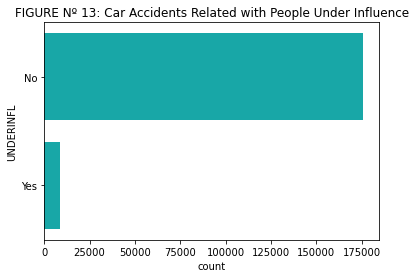

In [62]:
sns.countplot(y=df['UNDERINFL'], data=df, color="c")
plt.title('FIGURE Nº 13: Car Accidents Related with People Under Influence')

In [63]:
df['UNDERINFL'].value_counts()

No     175702
Yes      8880
Name: UNDERINFL, dtype: int64

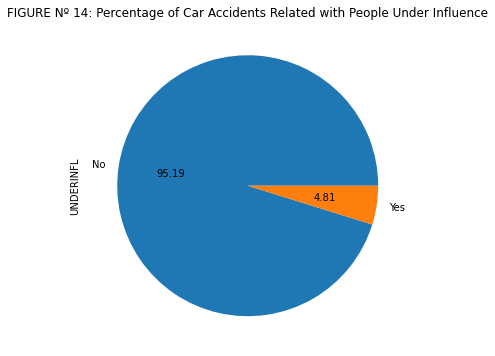

In [64]:
plot4 = (100 * df['UNDERINFL'].value_counts() / len(df['UNDERINFL'])).plot(kind='pie', autopct='%.2f', 
        figsize=(6, 6), title='FIGURE Nº 14: Percentage of Car Accidents Related with People Under Influence')

In [65]:
under_per = 100 * df['UNDERINFL'].value_counts() / len(df['UNDERINFL'])
under_per

No     95.18913
Yes     4.81087
Name: UNDERINFL, dtype: float64

## Collision Types vs. Severity Types

Text(0.5, 1.0, 'FIGURE Nº 15: Severity of car accidents vs. Collision Type')

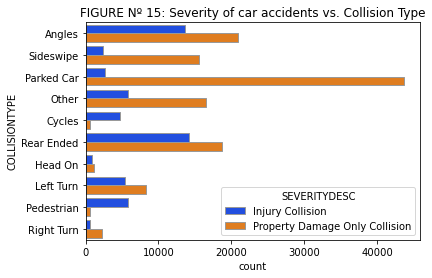

In [66]:
sns.countplot(y=df['COLLISIONTYPE'], hue=df['SEVERITYDESC'], data=df, palette="bright", edgecolor=".6")
plt.title('FIGURE Nº 15: Severity of car accidents vs. Collision Type')

In [67]:
#Tabla de la relacion entre las columnas COLLISIONTYPE y SEVERITYDESC
pd.crosstab(index=df['COLLISIONTYPE'],
            columns=df['SEVERITYDESC'], margins=True)

SEVERITYDESC,Injury Collision,Property Damage Only Collision,All
COLLISIONTYPE,,,
Angles,13573,20887,34460
Cycles,4712,666,5378
Head On,862,1135,1997
Left Turn,5382,8242,13624
Other,5796,16481,22277
Parked Car,2645,43736,46381
Pedestrian,5881,670,6551
Rear Ended,14219,18749,32968
Right Turn,601,2311,2912


In [68]:
#Tabla de Porcentaje de la relacion entre las columnas COLLISIONTYPE y SEVERITYDESC
pd.crosstab(index=df['COLLISIONTYPE'], columns=df['SEVERITYDESC'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

SEVERITYDESC,Injury Collision,Property Damage Only Collision,All
COLLISIONTYPE,,,
Angles,7.353371,11.315838,18.669209
Cycles,2.552795,0.360815,2.913610
Head On,0.467001,0.614903,1.081904
Left Turn,2.915777,4.465224,7.381001
Other,3.140068,8.928823,12.068891
Parked Car,1.432967,23.694618,25.127586
Pedestrian,3.186118,0.362982,3.549100
Rear Ended,7.703351,10.157545,17.860897
Right Turn,0.325601,1.252018,1.577619


## Weather vs. Road Condition - Percentage

In [69]:
#Tabla de Porcentaje de la relacion entre las columnas WEATHER y ROADCOND
pd.crosstab(index=df['WEATHER'], columns=df['ROADCOND'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

ROADCOND,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,All
WEATHER,,,,,,,,,,
Blowing Sand/Dirt,0.015711,0.003251,0.000000,0.000542,0.000000,0.002709,0.000000,0.000542,0.004334,0.027088
Clear,56.503343,0.338603,0.008668,0.032506,0.015169,0.051468,0.002709,0.260589,1.916222,59.129276
Fog/Smog/Smoke,0.190159,0.017878,0.000000,0.001084,0.001084,0.001084,0.000000,0.003792,0.084515,0.299596
Other,0.093725,0.010294,0.000542,0.003792,0.000542,0.004334,0.000000,0.272508,0.033048,0.418784
Overcast,8.598347,0.120814,0.004334,0.013002,0.008126,0.070429,0.003792,0.179866,5.699364,14.698075
Partly Cloudy,0.002167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000542,0.002709
Raining,0.329935,0.007585,0.013544,0.003251,0.005418,0.049301,0.043341,0.018420,16.870009,17.340802
Severe Crosswind,0.004876,0.001625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006501,0.013002
Sleet/Hail/Freezing Rain,0.002709,0.009752,0.000000,0.001625,0.000000,0.014628,0.001625,0.000000,0.030339,0.060678


## Weather vs. Light Condition - Percentage

In [70]:
#Tabla de Porcentaje de la relacion entre las columnas WEATHER y ROADCOND
pd.crosstab(index=df['WEATHER'], columns=df['LIGHTCOND'],margins=True).apply(lambda r: r/len(df) *100, axis=1)

LIGHTCOND,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,All
WEATHER,,,,,,,,,,
Blowing Sand/Dirt,0.000542,0.000000,0.007585,0.000000,0.001084,0.013544,0.001084,0.000000,0.003251,0.027088
Clear,0.411199,0.308264,13.572288,0.001625,0.545557,41.686622,1.723895,0.035756,0.844069,59.129276
Fog/Smog/Smoke,0.005959,0.009210,0.150611,0.000000,0.018420,0.107269,0.003251,0.000542,0.004334,0.299596
Other,0.004876,0.002709,0.074222,0.001084,0.004334,0.152778,0.011377,0.005959,0.161446,0.418784
Overcast,0.111062,0.103477,3.998765,0.000542,0.342395,9.319435,0.601359,0.014628,0.206412,14.698075
Partly Cloudy,0.000542,0.000000,0.000542,0.000000,0.000542,0.001084,0.000000,0.000000,0.000000,0.002709
Raining,0.193410,0.155486,6.870117,0.002709,0.346188,8.881148,0.678289,0.029255,0.184200,17.340802
Severe Crosswind,0.000542,0.001084,0.004876,0.000000,0.000000,0.005959,0.000542,0.000000,0.000000,0.013002
Sleet/Hail/Freezing Rain,0.001084,0.000542,0.028172,0.000000,0.001625,0.026546,0.001084,0.000542,0.001084,0.060678


# Modeling

## Decision Tree Algorithm with Weather, Road and Light Condition vs. Severity of Car Accidents

In [71]:
X = df[['WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [72]:
Xx = pd.get_dummies(data=X)

In [73]:
y = df['SEVERITYDESC']

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (147665, 29) (147665,)
Test set: (36917, 29) (36917,)


In [77]:
sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
sevTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [78]:
sevTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [79]:
yhat = sevTree.predict(x_test)

In [80]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [81]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.6994609529485061


In [82]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

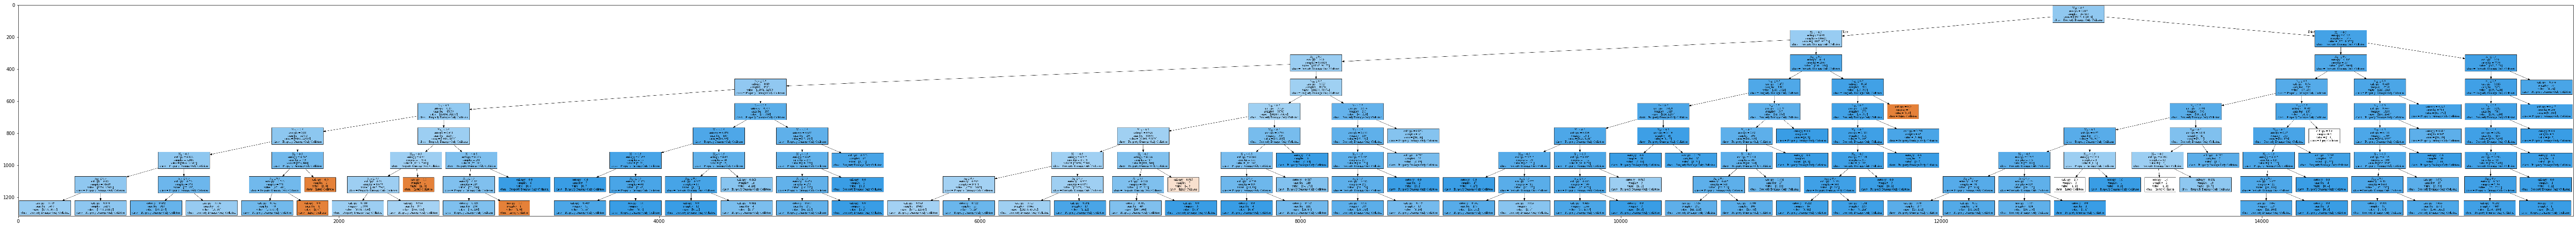

In [83]:
dot_data = StringIO()
filename = "sevtree8.png"
featureNames = df.columns[:]
targetNames = df["SEVERITYDESC"].unique().tolist()
out=tree.export_graphviz(sevTree, out_file=dot_data, class_names= np.unique(y_test), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Decision Tree Algorithm with Weather and Road Condition vs. Severity of Car Accidents

In [84]:
Xw = df[['WEATHER','ROADCOND']]
Xxw = pd.get_dummies(data=Xw)

In [85]:
X_train, x_test, y_train, y_test = train_test_split(Xxw, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (147665, 20) (147665,)
Test set: (36917, 20) (36917,)


In [86]:
sevTreew = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
sevTreew # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [87]:
sevTreew.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [88]:
yhatw = sevTreew.predict(x_test)

In [89]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhatw))

DecisionTrees's Accuracy:  0.6992984261993119


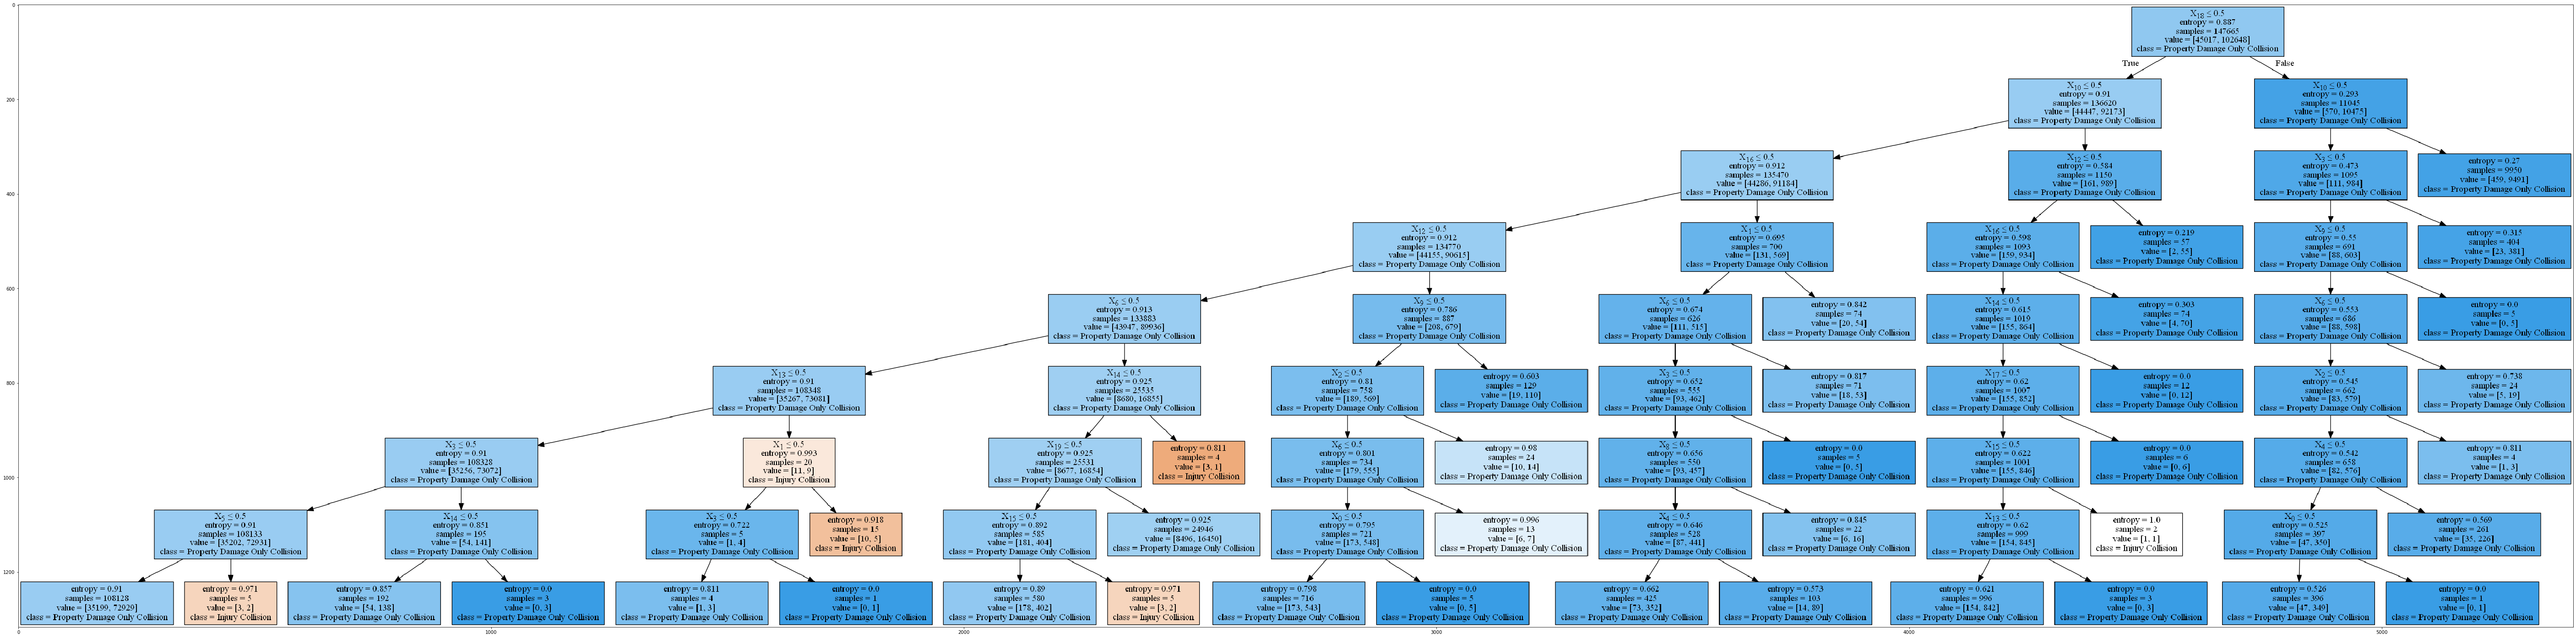

In [90]:
dot_data = StringIO()
filename = "sevtree8w.png"
featureNames = df.columns[:]
targetNames = df["SEVERITYDESC"].unique().tolist()
out=tree.export_graphviz(sevTreew, out_file=dot_data, class_names= np.unique(y_test), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Decision Tree Algorithm with Weather vs. Road Condition

In [91]:
Xwr = df['WEATHER']
Xxwr = pd.get_dummies(data=Xw)
yr = df['ROADCOND']

In [92]:
X_train, x_test, y_train, y_test = train_test_split(Xxwr, yr, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (147665, 20) (147665,)
Test set: (36917, 20) (36917,)


In [93]:
sevTreewr = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
sevTreewr # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [94]:
sevTreewr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [95]:
yhatwr = sevTreewr.predict(x_test)

In [96]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhatwr))

DecisionTrees's Accuracy:  1.0


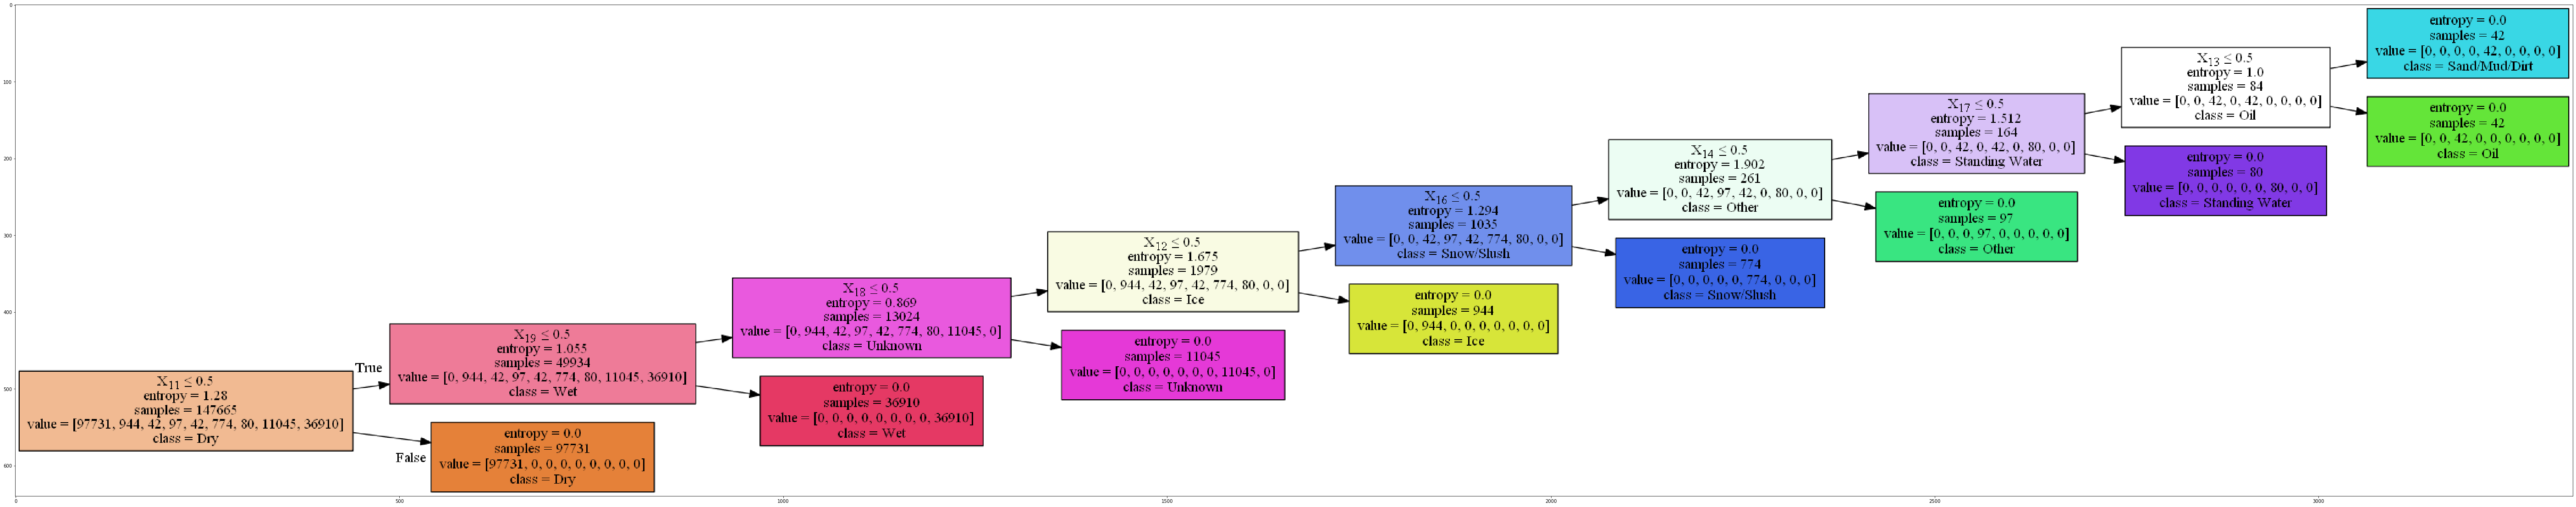

In [97]:
dot_data = StringIO()
filename = "sevtree8wr.png"
featureNames = df['WEATHER']
targetNames = df['ROADCOND'].unique().tolist()
out=tree.export_graphviz(sevTreewr, out_file=dot_data, class_names= np.unique(y_test), filled=True,  special_characters=True, rotate=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')